In [1]:
# import libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
# create a list of feature names

FEATURES = []
for i in range(1, 769):
  FEATURES.append('feature_' + str(i))
print(FEATURES)

['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44', 'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49', 'feature_50', 'feature_51', 'feature_52', 'feature_53', 'feature_54', 'feature_55', 'feature_56', 'feature_57', 'feature_58', 'feature_59', 'feature_60', 'feature_61', 'feature_62', 'feature_63', 'feature_64', 'feature_65', 'feature_66', 'feature_67', 'feature_68', 'feature_69', 'feature_70', 'feature_71', 'feature_72', 

In [3]:
# create a list of label names

LABELS = ['label_1', 'label_2', 'label_3', 'label_4']

In [4]:
# read the data

df_train = pd.read_csv('train.csv')
df_valid = pd.read_csv('valid.csv')
df_test = pd.read_csv('test.csv')

In [5]:
df_train.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
0,0.071810,0.068413,-0.022749,0.086143,0.026361,-0.028817,0.199237,-0.287368,-0.059560,-0.043694,...,0.004646,0.123011,0.043040,-0.042152,0.026225,0.072623,45,NaN,1,6
1,0.030930,0.024088,0.057811,-0.230877,-0.146281,0.102807,0.128767,-0.146269,0.053893,0.055378,...,0.077742,0.081691,-0.004778,0.171727,-0.026027,0.171089,45,NaN,1,6
2,-0.044019,-0.004626,-0.029383,-0.165376,-0.026611,-0.028142,-0.009649,-0.082088,0.018933,0.006830,...,0.076249,-0.046272,0.027831,0.028096,0.030994,0.009709,45,NaN,1,6
3,-0.086241,0.129585,-0.013893,0.089885,-0.100300,-0.035184,0.240980,-0.128362,-0.072328,-0.019385,...,0.006934,-0.049213,0.078852,0.088323,0.168815,-0.049188,45,NaN,1,6
4,0.126416,0.088338,0.088307,0.020371,0.174417,-0.030560,0.181163,-0.009382,0.085396,0.015823,...,-0.028883,0.110844,-0.041875,0.025686,0.003534,-0.104945,45,NaN,1,6


In [6]:
df_train.shape

(28520, 772)

In [7]:
df_train.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
count,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,...,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28040.000000,28520.000000,28520.000000
mean,0.000905,0.046109,-0.007867,0.006516,-0.084563,-0.041206,0.115190,-0.062550,-0.015853,-0.018170,...,-0.041763,0.008129,-0.005715,0.048044,0.037690,-0.038338,30.498843,27.975107,0.799299,5.997125
std,0.074272,0.051005,0.059429,0.083817,0.079565,0.055698,0.100403,0.069030,0.061706,0.062766,...,0.078832,0.064496,0.059127,0.068831,0.056442,0.089426,17.328389,5.735913,0.400532,2.375567
min,-0.263766,-0.167903,-0.241743,-0.310653,-0.521423,-0.303506,-0.266982,-0.351085,-0.286419,-0.275221,...,-0.351263,-0.243115,-0.267768,-0.244857,-0.179989,-0.348414,1.000000,22.000000,0.000000,0.000000
25%,-0.050877,0.009260,-0.049900,-0.046124,-0.135082,-0.075579,0.040635,-0.107370,-0.057616,-0.056116,...,-0.094268,-0.033156,-0.044131,0.002746,-0.001078,-0.096872,15.000000,25.000000,1.000000,6.000000
50%,-0.005263,0.046863,-0.009273,0.010040,-0.081096,-0.039769,0.113300,-0.058721,-0.020981,-0.018736,...,-0.041934,0.009489,-0.002159,0.040703,0.035666,-0.034802,30.000000,27.000000,1.000000,6.000000
75%,0.049738,0.082203,0.032208,0.063190,-0.033008,-0.004525,0.184644,-0.016211,0.023647,0.022856,...,0.010713,0.051168,0.035046,0.086970,0.074293,0.019831,46.000000,30.000000,1.000000,6.000000
max,0.305164,0.257933,0.240829,0.286214,0.214045,0.216048,0.466118,0.195778,0.258841,0.207526,...,0.303684,0.250487,0.276657,0.396895,0.297229,0.283199,60.000000,61.000000,1.000000,13.000000


In [8]:
df_valid.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
0,-0.029340,-0.026572,0.006227,-0.157240,-0.126458,-0.016806,0.011338,-0.051527,-0.051583,-0.027086,...,0.047600,-0.012270,0.043381,-0.022228,0.046098,0.049717,45,NaN,1,6
1,0.092717,0.067198,0.061320,-0.201336,-0.252250,0.006088,0.011854,-0.277564,0.029302,-0.034736,...,0.093419,0.139447,0.047001,-0.042325,0.031232,0.053672,45,NaN,1,6
2,-0.014250,0.072214,-0.053749,-0.016300,-0.142032,0.077692,0.121140,-0.098746,-0.009898,-0.006798,...,-0.023516,-0.063519,0.042752,-0.011081,0.161032,0.053349,45,NaN,1,6
3,-0.056856,0.014097,-0.029236,-0.150747,-0.078507,-0.040386,0.001480,-0.070090,0.025345,-0.039243,...,0.061066,-0.046192,0.059160,0.024137,0.062927,0.037316,45,NaN,1,6
4,-0.046353,0.054917,-0.081850,0.161505,0.054402,-0.138667,0.278676,-0.032590,-0.008799,-0.028483,...,-0.058222,0.012435,-0.009338,0.060546,0.056563,-0.178438,45,NaN,1,6


In [9]:
df_valid.shape

(750, 772)

In [10]:
df_valid.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,...,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,736.000000,750.000000,750.000000
mean,0.002629,0.045339,-0.007939,0.003979,-0.087809,-0.038223,0.112724,-0.066751,-0.015791,-0.021099,...,-0.040125,0.006835,-0.003307,0.047442,0.039883,-0.035003,30.085333,28.330163,0.810667,6.117333
std,0.073356,0.054732,0.061638,0.086686,0.076156,0.059974,0.098778,0.070885,0.060367,0.063077,...,0.079482,0.063113,0.058104,0.067712,0.056110,0.090682,17.489060,6.518500,0.392035,2.227895
min,-0.208676,-0.118051,-0.164100,-0.241533,-0.306765,-0.222245,-0.179094,-0.278774,-0.222152,-0.243257,...,-0.313659,-0.228801,-0.208390,-0.170762,-0.108228,-0.295577,1.000000,22.000000,0.000000,0.000000
25%,-0.048063,0.004218,-0.050210,-0.051797,-0.141736,-0.073480,0.039855,-0.111062,-0.057787,-0.056611,...,-0.096236,-0.032558,-0.041780,0.004044,0.004210,-0.098228,15.000000,25.000000,1.000000,6.000000
50%,-0.001621,0.045285,-0.009527,0.008934,-0.084373,-0.035660,0.109413,-0.063984,-0.016004,-0.020811,...,-0.040675,0.008233,0.002093,0.038779,0.036438,-0.032180,29.000000,27.000000,1.000000,6.000000
75%,0.051251,0.084526,0.030097,0.064821,-0.035880,-0.002297,0.183114,-0.021565,0.025685,0.016384,...,0.016651,0.049676,0.036406,0.083856,0.074590,0.021674,45.000000,30.000000,1.000000,6.000000
max,0.227956,0.213754,0.179822,0.218292,0.145068,0.175861,0.365379,0.167460,0.163337,0.195148,...,0.170859,0.188099,0.180689,0.304480,0.301419,0.223179,60.000000,61.000000,1.000000,13.000000


In [11]:
missing_values_sum =  df_train.isnull().sum()
missing_values_sum[missing_values_sum > 0]

label_2    480
dtype: int64

Label 2 has missing values, missing values need to be removed when generating the training and validation data

In [12]:
data_dict = dict()

for label in LABELS:
  data_dict[label] = dict()
  
  data_dict[label]['x_train'] = df_train[df_train[label].notna()][FEATURES].values
  data_dict[label]['y_train'] = df_train[df_train[label].notna()][label].values
  data_dict[label]['x_valid'] = df_valid[df_valid[label].notna()][FEATURES].values
  data_dict[label]['y_valid'] = df_valid[df_valid[label].notna()][label].values
  data_dict[label]['x_test'] = df_test[FEATURES].values

In [13]:
data_dict['label_2']['x_train'].shape

(28040, 768)

In [14]:
data_dict['label_2']['x_valid'].shape

(736, 768)

In [15]:
data_dict['label_2']['y_train'].shape

(28040,)

In [16]:
data_dict['label_2']['y_valid'].shape

(736,)

In [17]:
data_dict['label_2']['y_valid']

array([25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25.,
       25., 25., 25., 25., 25., 27., 27., 27., 27., 27., 27., 27., 27.,
       27., 27., 23., 23., 23., 23., 23., 23., 23., 23., 23., 23., 23.,
       23., 23., 23., 23., 33., 33., 33., 33., 33., 33., 33., 33., 33.,
       33., 33., 33., 33., 33., 33., 33., 33., 33., 33., 34., 34., 34.,
       34., 34., 34., 34., 34., 34., 34., 34., 22., 22., 22., 22., 22.,
       22., 22., 22., 22., 22., 22., 30., 30., 30., 30., 30., 30., 30.,
       30., 30., 30., 30., 26., 26., 26., 26., 26., 26., 26., 26., 24.,
       24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
       24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
       24., 24., 24., 24., 24., 24., 31., 31., 31., 31., 31., 31., 31.,
       31., 31., 31., 31., 31., 26., 26., 26., 26., 26., 26., 26., 26.,
       26., 26., 26., 26., 31., 31., 31., 31., 31., 31., 31., 31., 31.,
       31., 31., 31., 29., 29., 29., 29., 29., 29., 29., 29., 29

### Without any feature engineering, hyperparameter tuning

In [18]:
svc_model = SVC(kernel='linear', C=1.0, random_state=42)

df_test_pred = pd.DataFrame()

for label in LABELS:
  svc_model.fit(data_dict[label]['x_train'], data_dict[label]['y_train'])
  svc_pred = svc_model.predict(data_dict[label]['x_valid'])
  print('accuracy_score for {}: '.format(label), accuracy_score(data_dict[label]['y_valid'], svc_pred))

  svc_test_pred = svc_model.predict(data_dict[label]['x_test'])
  df_test_pred[label] = svc_test_pred

df_test_pred.head()

accuracy_score for label_1:  0.9506666666666667
accuracy_score for label_2:  0.8125
accuracy_score for label_3:  0.9973333333333333
accuracy_score for label_4:  0.9426666666666667


,label_1,label_2,label_3,label_4
0,26,22.0,0,2
1,18,25.0,1,8
2,16,30.0,1,6
3,7,27.0,1,6
4,58,29.0,0,6


In [19]:
# index.name = ID and start index from 1

df_test_pred.index += 1
df_test_pred.index.name = 'ID'
df_test_pred.head()
df_test_pred.to_csv('submission.csv')

## Visualize the distribution of the labels

### Training data

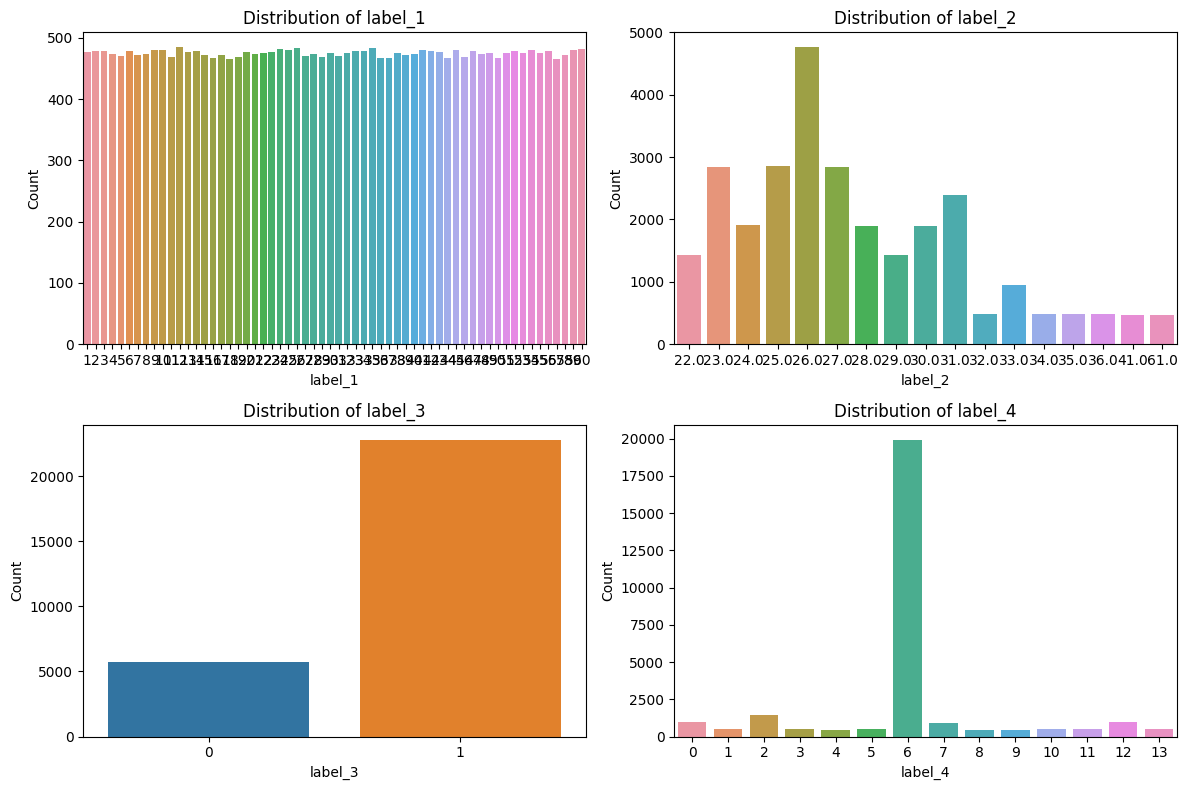

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i, label in enumerate(LABELS):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.countplot(data=df_train, x=label, ax=ax)
    ax.set_title(f'Distribution of {label}')
    ax.set_xlabel(label)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


label1 shows a balanced distribution, label3 and label4 have one dominant class each, label2 has a skewed distribution. label4 needs to be oversampled to balance the distribution.

### PCA

In [36]:
from sklearn.decomposition import PCA

svc_model_pca = SVC(kernel='linear', C=1.0, random_state=42)

df_test_pred = pd.DataFrame()

pca = PCA(n_components=500,svd_solver='full')

for label in LABELS:
  x_train_pca = pca.fit_transform(data_dict[label]['x_train'])
  svc_model_pca.fit(x_train_pca, data_dict[label]['y_train'])

  x_valid_pca = pca.transform(data_dict[label]['x_valid'])
  svc_pred = svc_model_pca.predict(x_valid_pca)
  print('accuracy_score for {}: '.format(label), accuracy_score(data_dict[label]['y_valid'], svc_pred))

  x_test_pca = pca.transform(data_dict[label]['x_test'])
  svc_test_pred = svc_model_pca.predict(x_test_pca)
  df_test_pred[label] = svc_test_pred

df_test_pred.head()

KeyboardInterrupt: 

In [26]:
# grid search for best parameters

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

param_grid = {
              'C': [1, 10, 100]}
base_estimator = SVC(gamma='scale', kernel='rbf', random_state=42)
search = HalvingGridSearchCV(base_estimator, param_grid, cv=5, verbose=1, n_jobs=7)
search.fit(data_dict['label_1']['x_train'], data_dict['label_1']['y_train'])

print(search.best_params_)


n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 9506
max_resources_: 28520
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 3
n_resources: 9506
Fitting 5 folds for each of 3 candidates, totalling 15 fits


----------
iter: 1
n_candidates: 1
n_resources: 28518
Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'C': 100}


In [27]:
svc_model_after_halving_search = SVC(kernel='rbf', gamma='scale', C=100, random_state=42)

df_test_pred = pd.DataFrame()

for label in LABELS:
  svc_model_after_halving_search.fit(data_dict[label]['x_train'], data_dict[label]['y_train'])

  svc_pred = svc_model_after_halving_search.predict(data_dict[label]['x_valid'])
  print('accuracy_score for {}: '.format(label), accuracy_score(data_dict[label]['y_valid'], svc_pred))

  svc_test_pred = svc_model_after_halving_search.predict(data_dict[label]['x_test'])
  df_test_pred[label] = svc_test_pred

df_test_pred.head()

accuracy_score for label_1:  0.9746666666666667
accuracy_score for label_2:  0.9415760869565217
accuracy_score for label_3:  0.9973333333333333
accuracy_score for label_4:  0.9773333333333334


,label_1,label_2,label_3,label_4
0,26,22.0,0,2
1,18,25.0,1,8
2,16,30.0,1,6
3,7,27.0,1,6
4,58,29.0,0,6


In [28]:
# index.name = ID and start index from 1

df_test_pred.index += 1
df_test_pred.index.name = 'ID'
df_test_pred.head()
df_test_pred.to_csv('submission_2.csv')

In [34]:
# PCA only for label_3

svc_model_pca = SVC(kernel='rbf', C=100, random_state=42)

pca = PCA(n_components=0.97 ,svd_solver='full')

x_train_pca = pca.fit_transform(data_dict['label_3']['x_train'])
svc_model_pca.fit(x_train_pca, data_dict['label_3']['y_train'])

x_valid_pca = pca.transform(data_dict['label_3']['x_valid'])
svc_pred = svc_model_pca.predict(x_valid_pca)
print('accuracy_score for {}: '.format('label_3'), accuracy_score(data_dict['label_3']['y_valid'], svc_pred))

x_test_pca = pca.transform(data_dict['label_3']['x_test'])
svc_test_pred = svc_model_pca.predict(x_test_pca)
df_test_pred['label_3'] = svc_test_pred

df_test_pred.head()

accuracy_score for label_4:  0.9986666666666667


,label_1,label_2,label_3,label_4
ID,,,,
1,26,22.0,0,2
2,18,25.0,1,8
3,16,30.0,1,6
4,7,27.0,1,6
5,58,29.0,0,6


In [35]:
df_test_pred.to_csv('submission_3.csv')